## Modelling Exercise: Data Visualization

This notebook shows the different plots of the data. Insights may be gathered on which features to choose for modelling.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_excel('Data.xlsx', sheet_name=['Soc_Dem', 'Products_ActBalance', 'Inflow_Outflow', 'Sales_Revenues'])

Soc_Dem = df['Soc_Dem'].sort_values('Client').fillna('M')
Prod_ActBal = df['Products_ActBalance'].sort_values('Client')
Cash_Flow = df['Inflow_Outflow'].sort_values('Client').reset_index(drop=True)
Sales_Rev = df['Sales_Revenues'].sort_values('Client').reset_index(drop=True)

Creating training set dataframe

In [9]:
train_df = Soc_Dem.merge(Prod_ActBal, how='right', on='Client').merge(Cash_Flow, how='right', on='Client').merge(Sales_Rev, how='right', on='Client')
train_df.fillna(value=0, inplace=True)
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'].astype(str))
train_df['Sex'] = train_df['Sex'].replace(to_replace=0, value=1)-1
train_df.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,0,51.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,...,30.0,3.0,12.0,9.0,1,0,0,26.972679,0.0,0.0
1,2,1,43.0,152.0,1.0,1.0,0.0,0.0,0.0,0.0,...,6.0,2.0,2.0,1.0,0,0,0,0.000000,0.0,0.0
2,6,0,24.0,19.0,1.0,0.0,0.0,0.0,0.0,1.0,...,6.0,1.0,0.0,0.0,0,0,0,0.000000,0.0,0.0
3,8,0,64.0,30.0,1.0,0.0,0.0,1.0,0.0,0.0,...,24.0,10.0,1.0,0.0,0,0,0,0.000000,0.0,0.0
4,13,0,66.0,132.0,1.0,1.0,0.0,0.0,0.0,1.0,...,39.0,6.0,17.0,10.0,0,0,0,0.000000,0.0,0.0


Creating test set dataframe (used for prediction and selection of 100 clients)

In [10]:
main_df = Soc_Dem.merge(Prod_ActBal, how='left', on='Client').merge(Cash_Flow, how='left', on='Client')
main_df.fillna(value=0, inplace=True)
main_df['Sex'] = LabelEncoder().fit_transform(main_df['Sex'].astype(str))
main_df['Sex'] = main_df['Sex'].replace(to_replace=0, value=1)-1

cond = main_df['Client'].isin(train_df['Client'])
toPredict_df = main_df.drop(main_df[cond].index).reset_index(drop=True)
toPredict_df.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,3,0,17,140,1,0.0,1.0,0.0,0.0,0.0,...,123.750000,123.750000,0.000000,112.857143,10.678571,3.0,3.0,0.0,1.0,1.0
1,4,0,24,153,1,1.0,0.0,0.0,1.0,0.0,...,3614.747500,3598.950357,714.285714,526.037500,1963.165357,41.0,36.0,6.0,12.0,13.0
2,5,0,58,200,1,1.0,0.0,0.0,0.0,0.0,...,5868.460714,4031.925000,157.142857,832.175000,1779.571429,44.0,41.0,4.0,17.0,13.0
3,7,0,55,227,1,0.0,0.0,0.0,0.0,0.0,...,99.043929,99.043929,17.857143,69.151071,10.714286,10.0,10.0,1.0,6.0,1.0
4,9,0,33,182,1,0.0,0.0,1.0,0.0,0.0,...,415.460714,375.705357,53.571429,0.000000,170.714286,10.0,7.0,1.0,0.0,3.0


## Splitting training set into owned products

In [11]:
clients_CC1 = train_df[(train_df['Sale_CC'] == 1)]
clients_CC0 = train_df[(train_df['Sale_CC'] == 0)]

clients_MF1 = train_df[(train_df['Sale_MF'] == 1)]
clients_MF0 = train_df[(train_df['Sale_MF'] == 0)]
  
clients_CL1 = train_df[(train_df['Sale_CL'] == 1)]
clients_CL0 = train_df[(train_df['Sale_CL'] == 0)]

Plotting histogram of each feature vs the owned product

### CC Sales

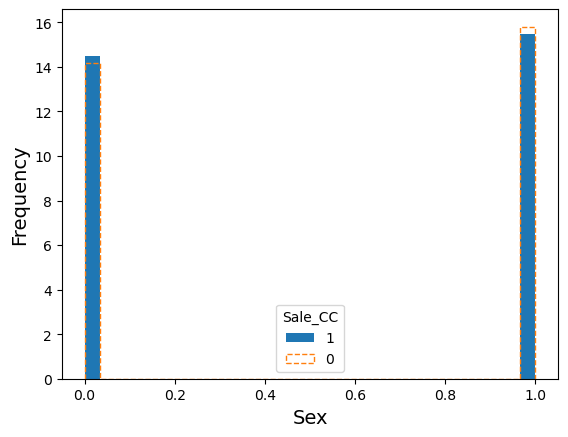

1
1


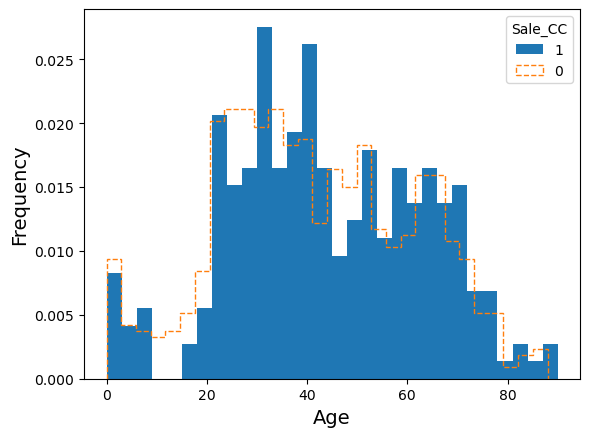

30.0
23.0


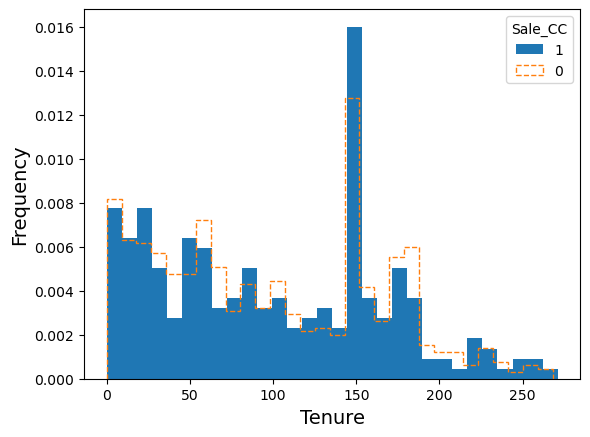

150.0
150.0


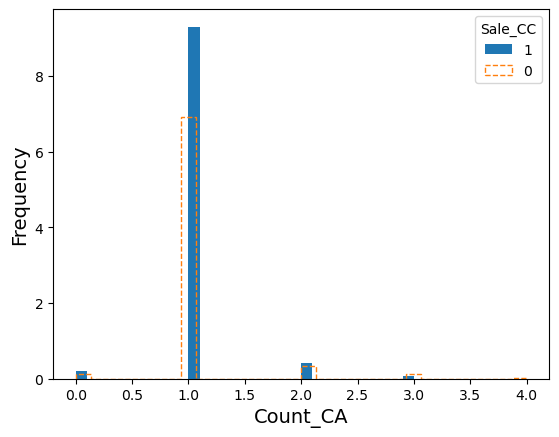

1.0
1.0


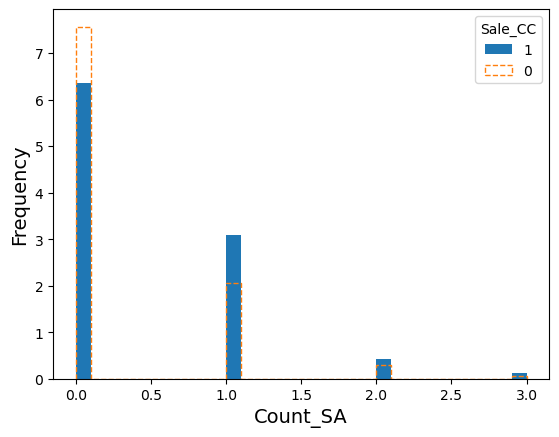

0.0
0.0


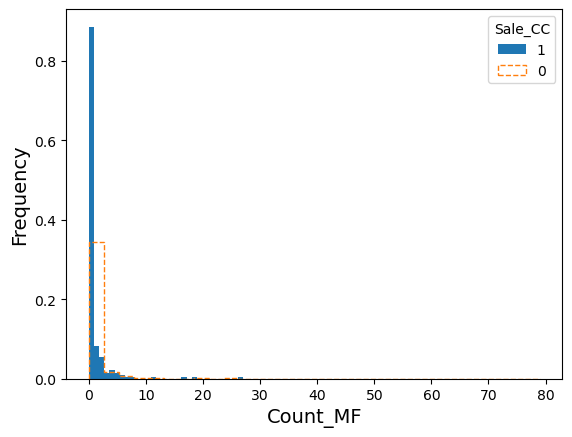

0.0
0.0


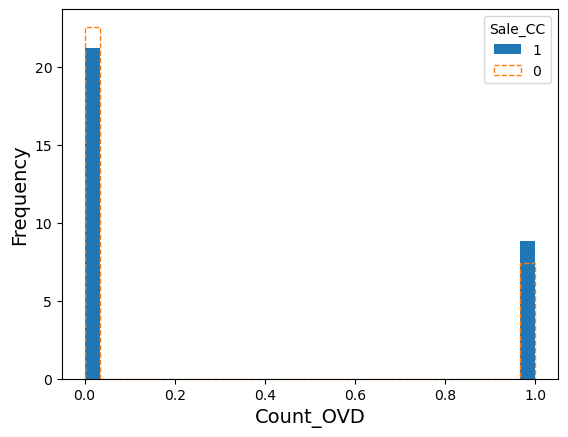

0.0
0.0


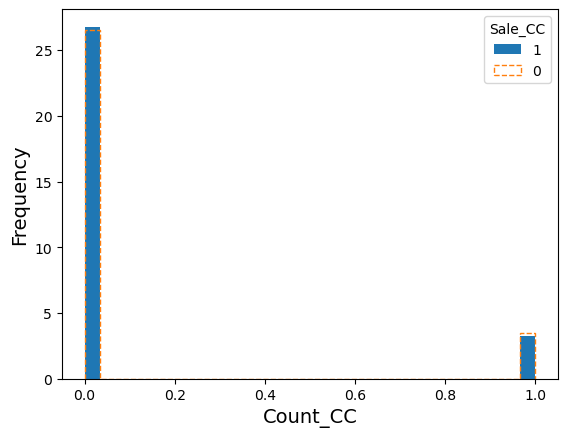

0.0
0.0


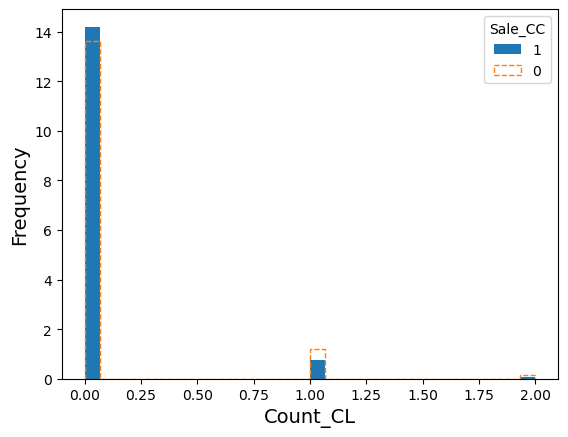

0.0
0.0


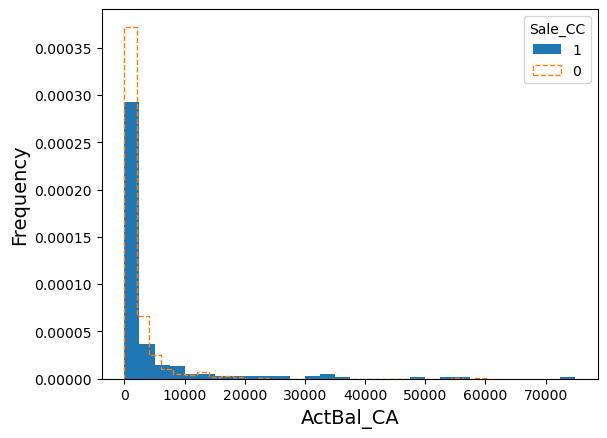

0.0
0.0


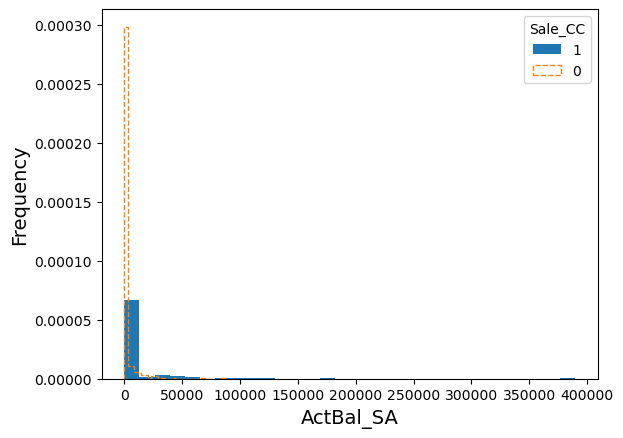

0.0
0.0


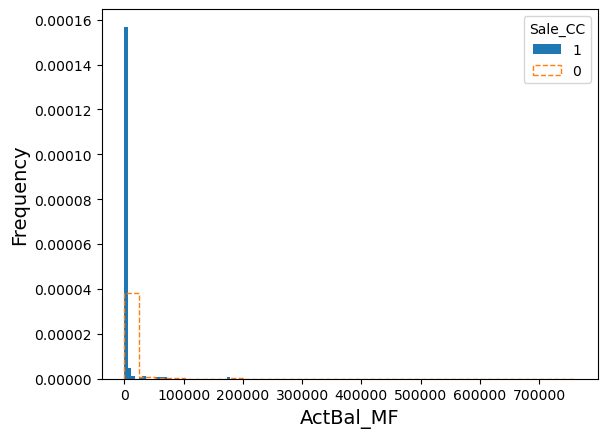

0.0
0.0


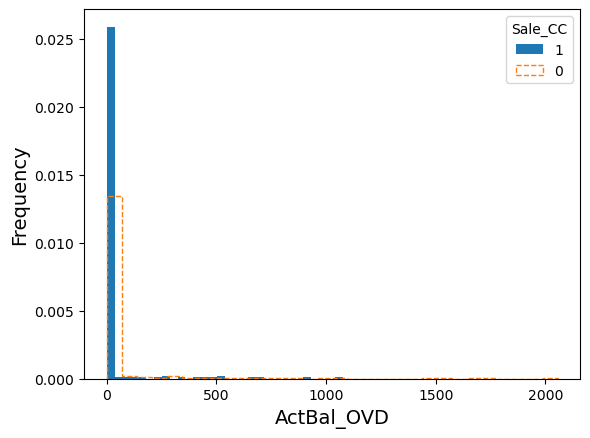

0.0
0.0


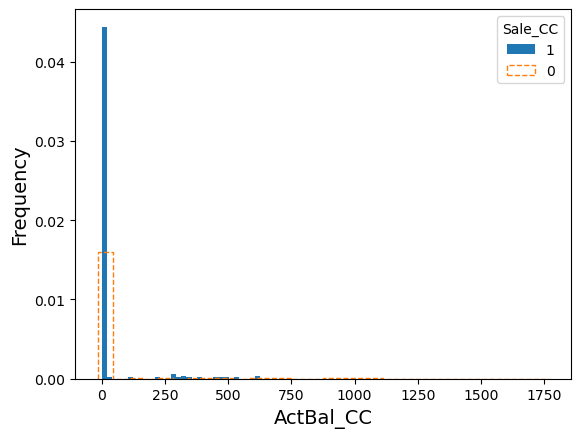

0.0
0.0


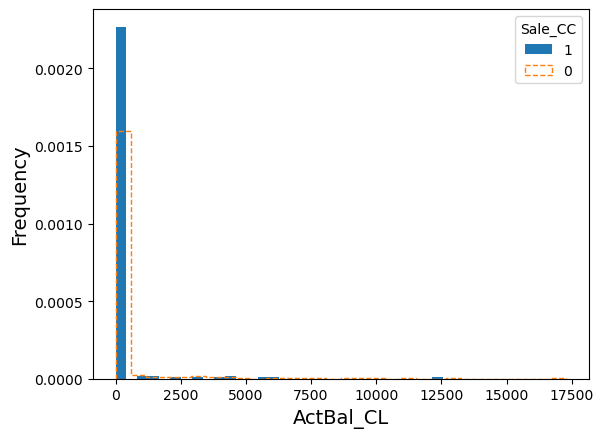

0.0
0.0


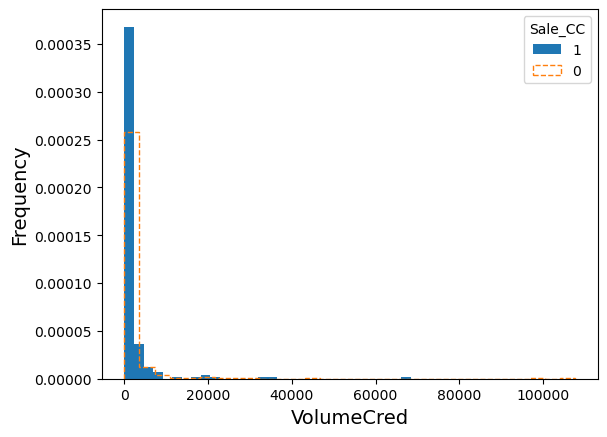

0.0
0.0


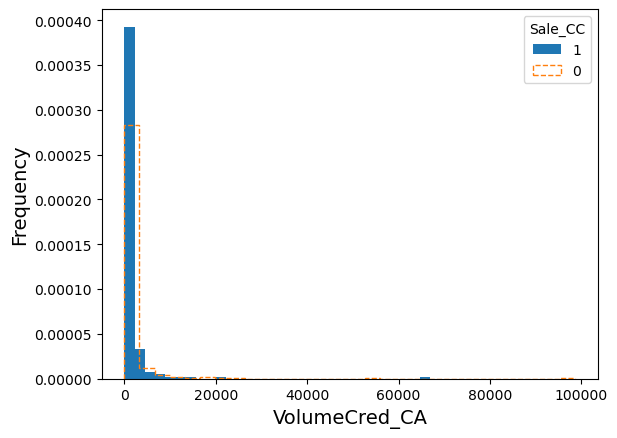

0.0
0.0


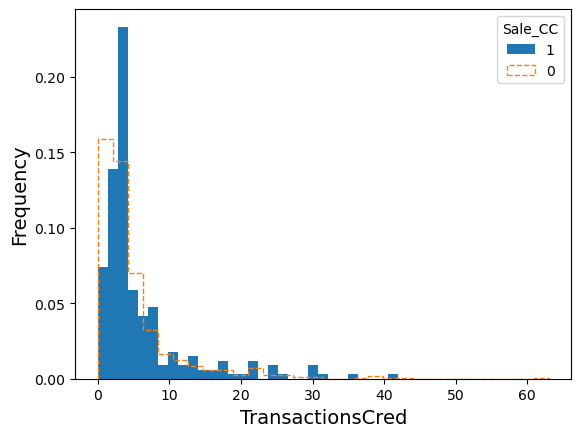

3.0
2.0


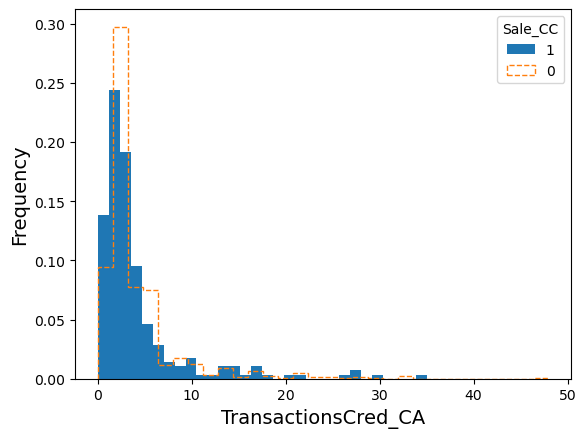

2.0
2.0


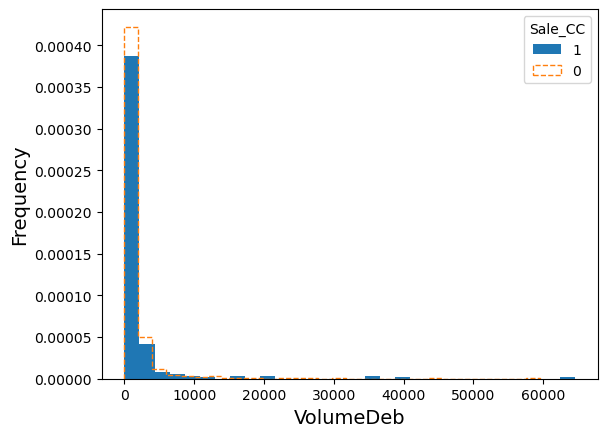

0.0
0.0


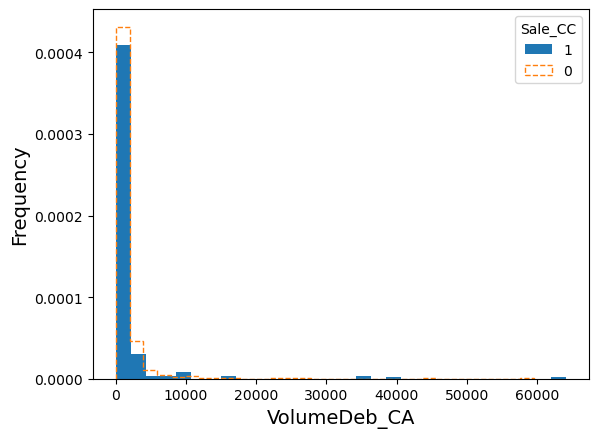

0.0
0.0


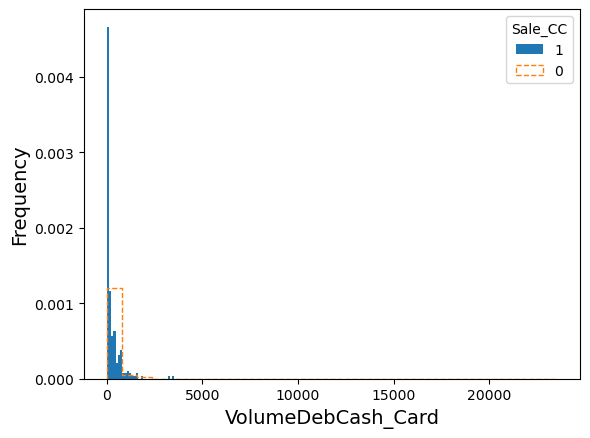

0.0
0.0


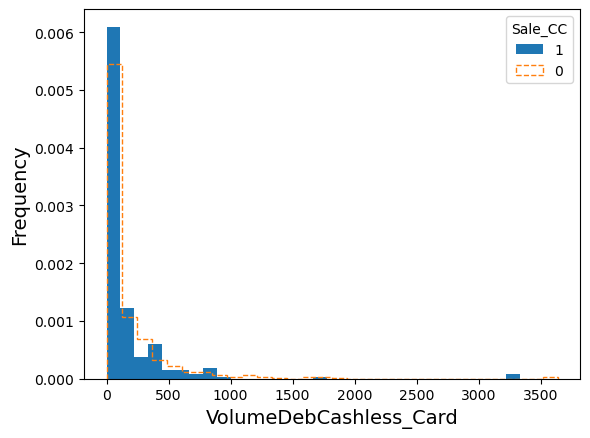

0.0
0.0


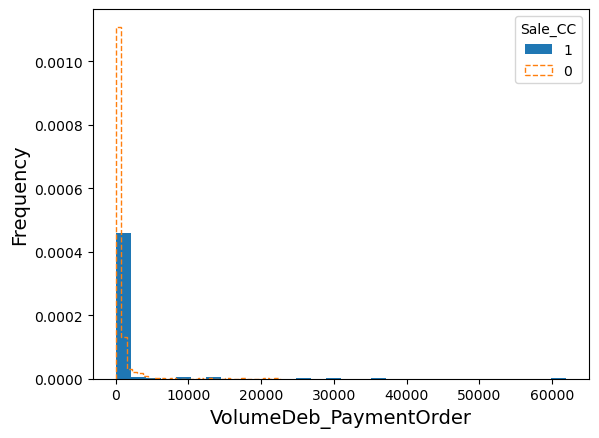

0.0
0.0


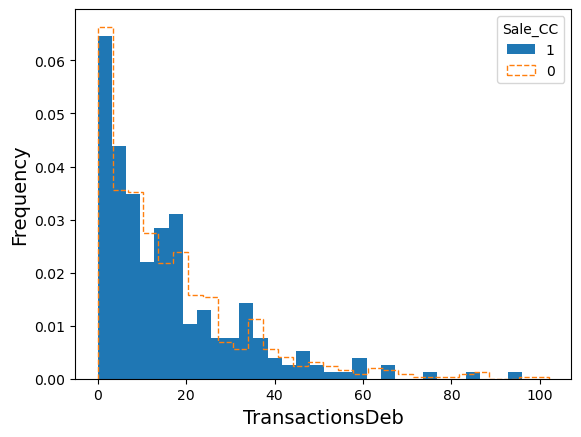

6.0
0.0


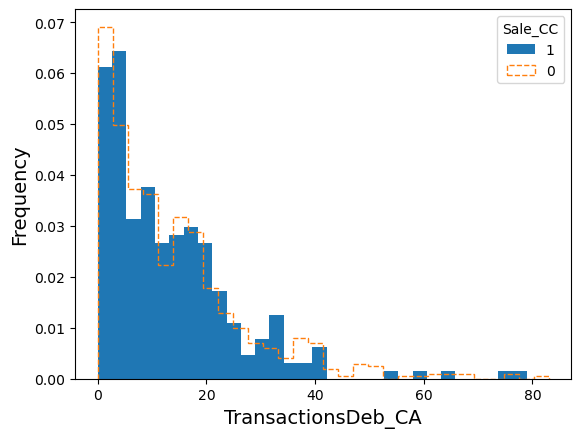

3.0
1.0


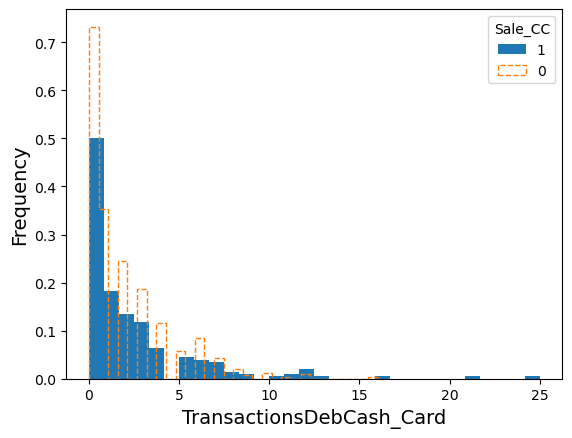

0.0
0.0


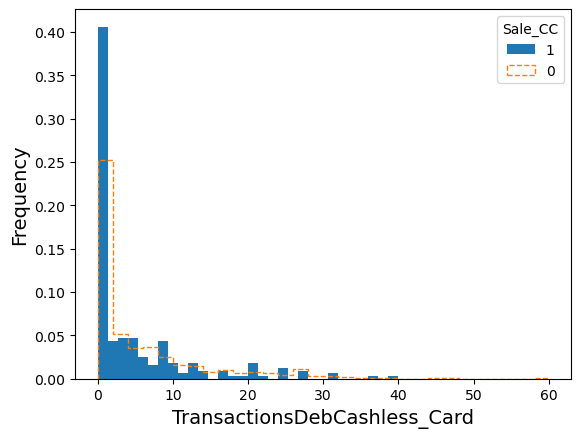

0.0
0.0


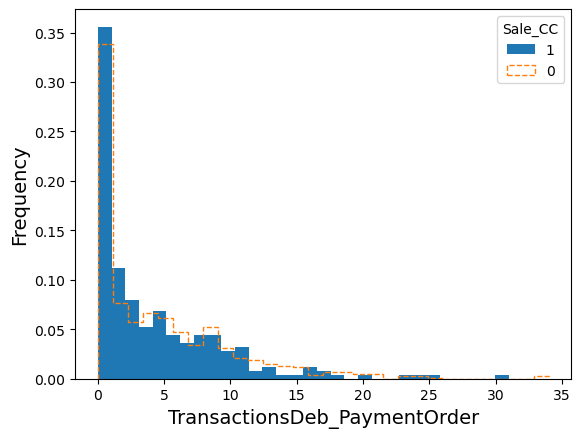

0.0
0.0


In [18]:
for input_counter in range(1,30):
    clients_CC1.iloc[:,input_counter].plot.hist(label='1', bins=30, density=1, sharex=True, sharey=True)
    clients_CC0.iloc[:,input_counter].plot.hist(linestyle='dashed', histtype='step', label='0', bins=30, density=1, sharex=True, sharey=True)
    plt.xlabel(clients_CC1.iloc[:,input_counter].name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(title='Sale_CC')
    plt.show()
    print(clients_CC1.iloc[:,input_counter].value_counts().idxmax())
    print(clients_CC0.iloc[:,input_counter].value_counts().idxmax())

### MF Sales

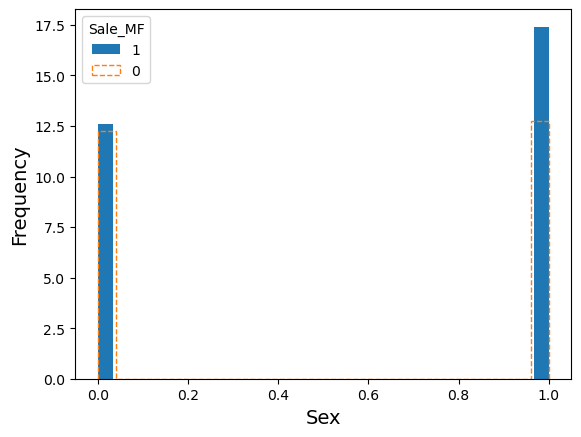

1
1


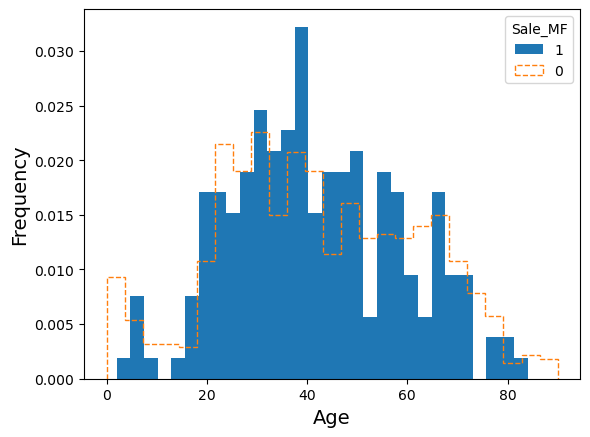

39.0
27.0


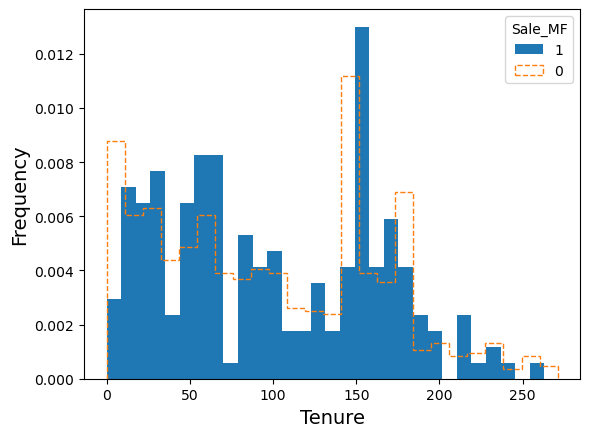

151.0
150.0


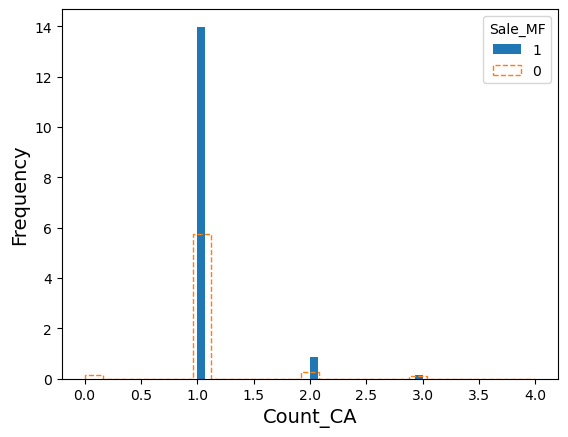

1.0
1.0


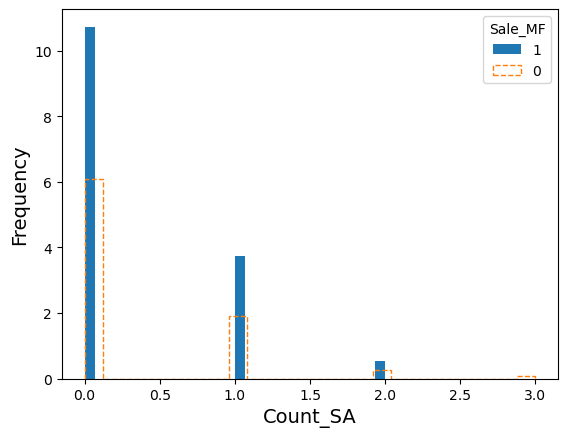

0.0
0.0


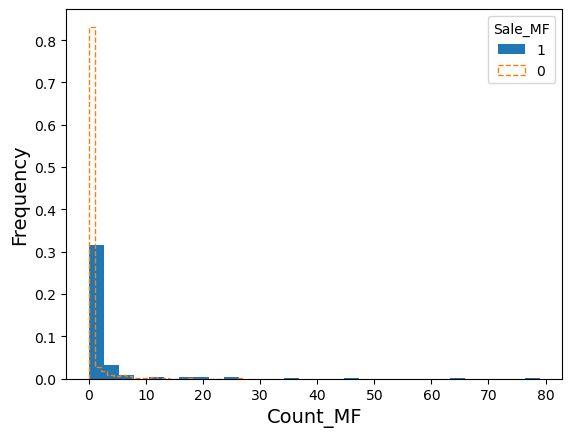

0.0
0.0


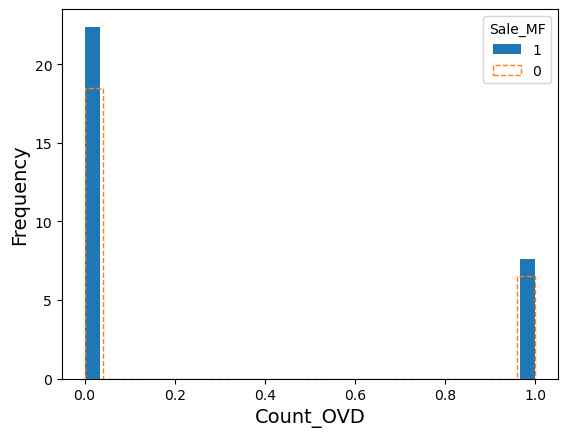

0.0
0.0


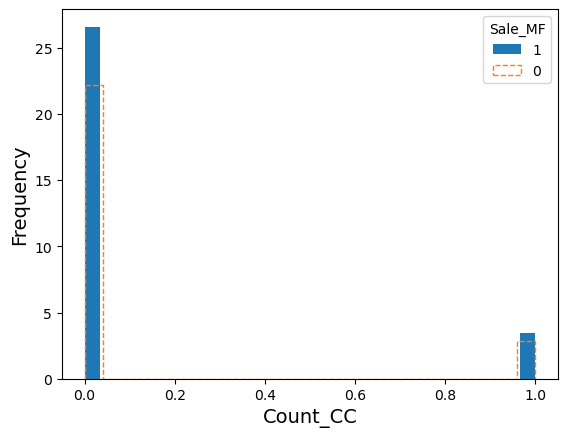

0.0
0.0


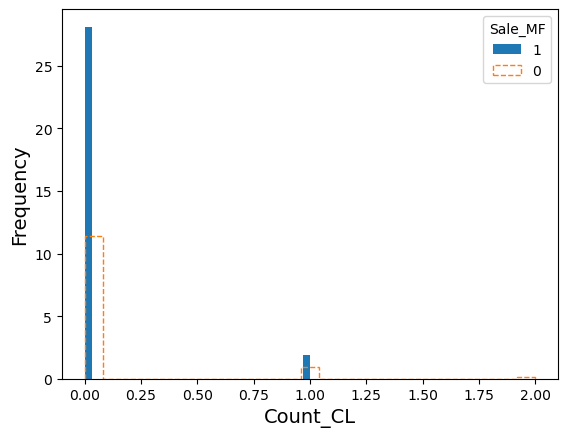

0.0
0.0


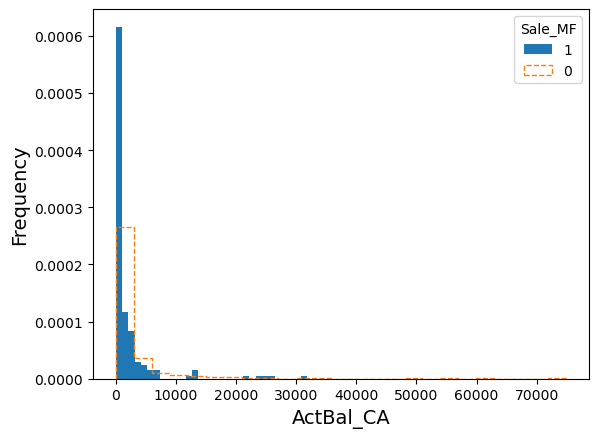

0.0
0.0


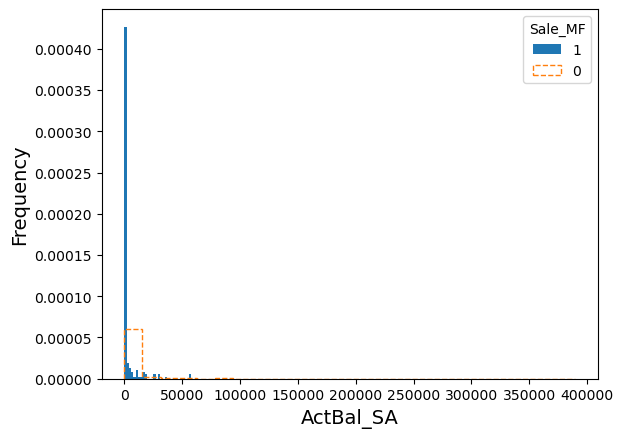

0.0
0.0


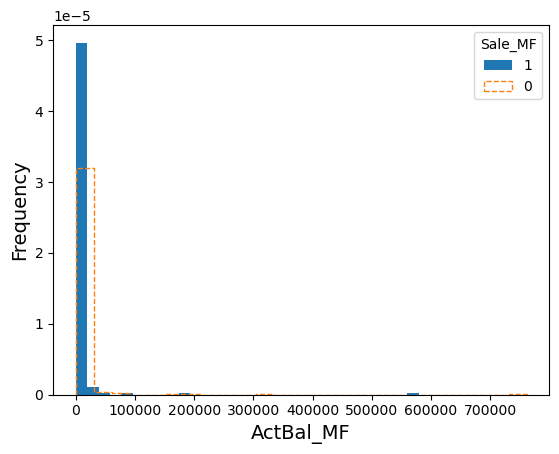

0.0
0.0


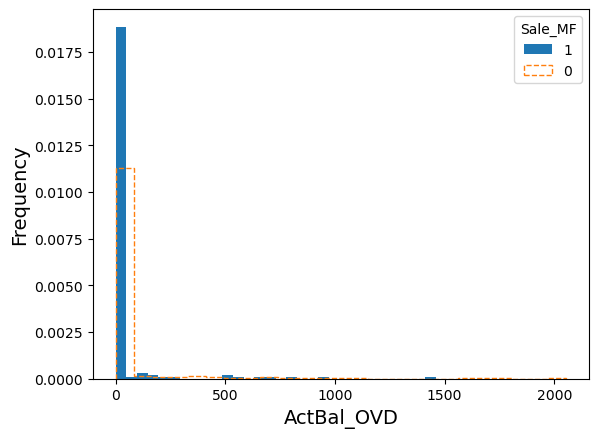

0.0
0.0


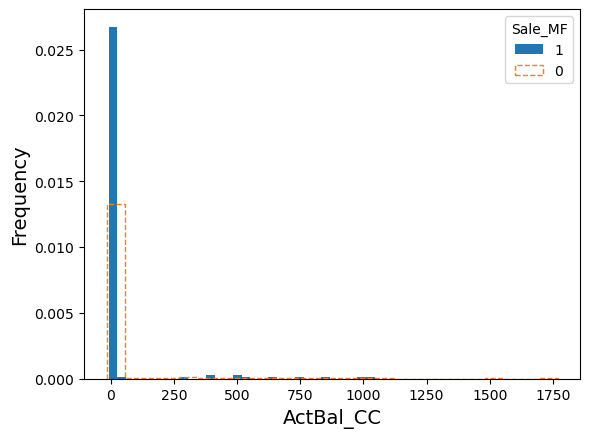

0.0
0.0


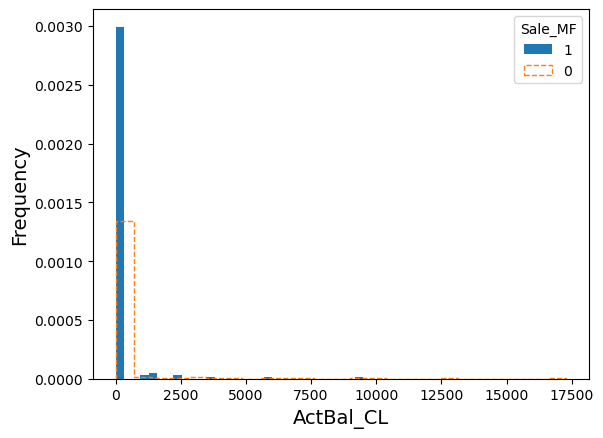

0.0
0.0


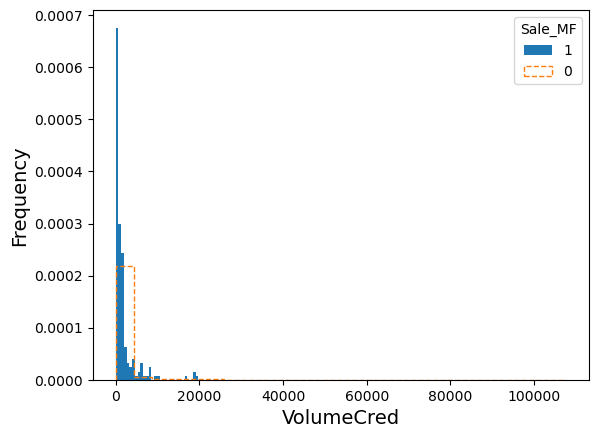

0.00035714285714285714
0.0


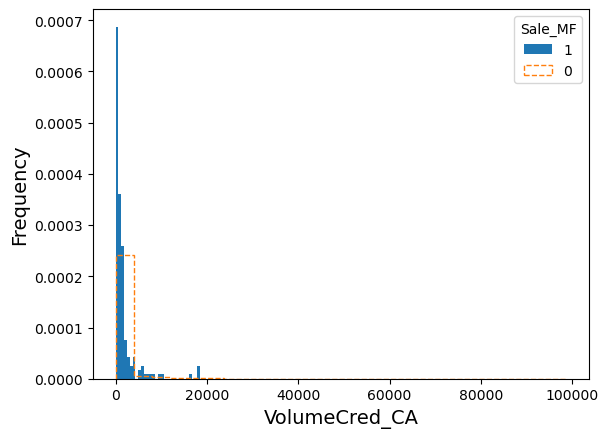

0.00035714285714285714
0.0


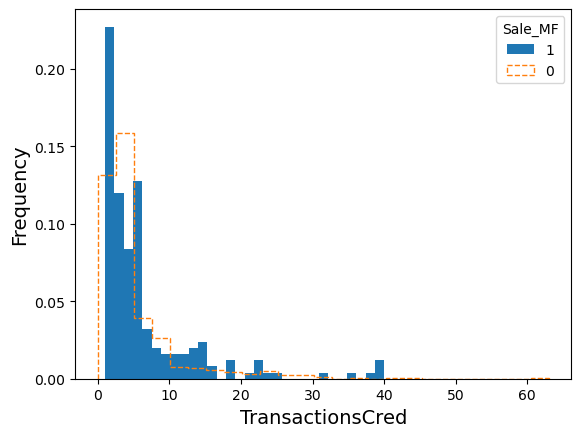

2.0
2.0


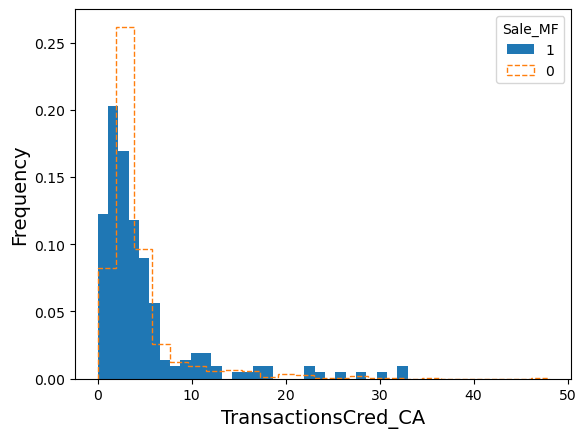

2.0
2.0


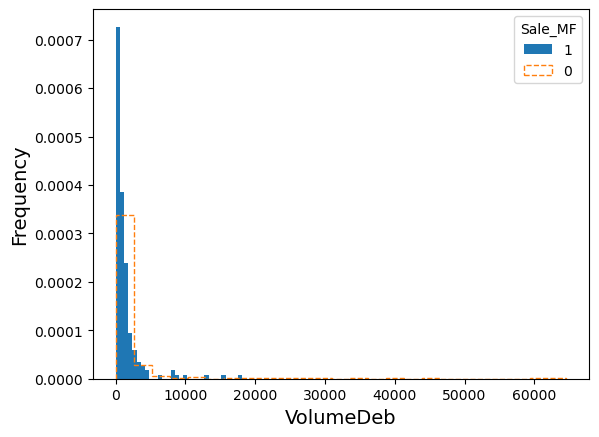

0.0
0.0


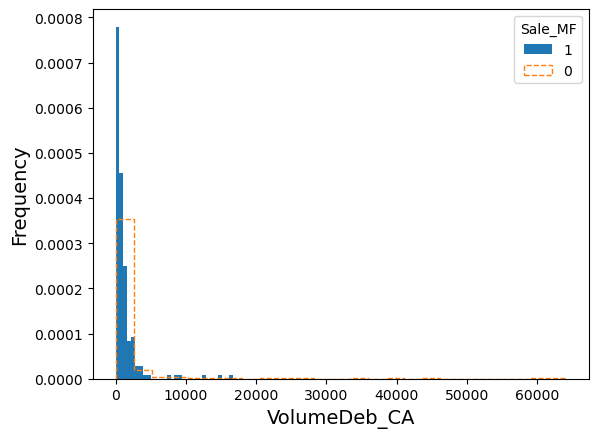

0.0
0.0


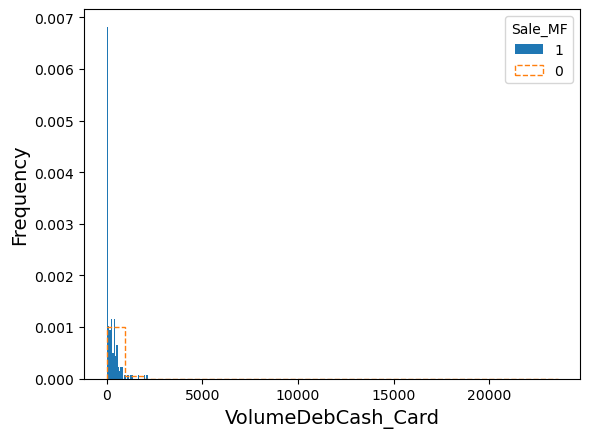

0.0
0.0


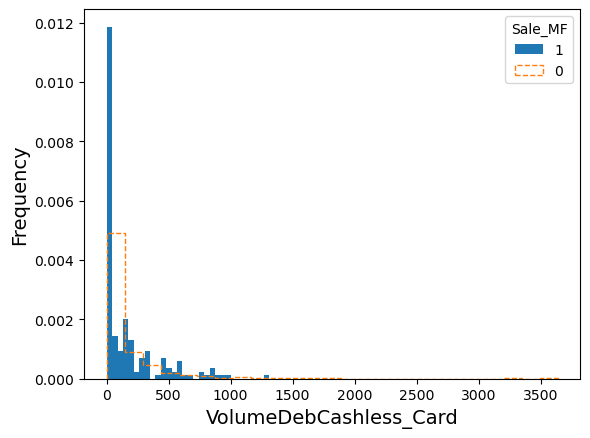

0.0
0.0


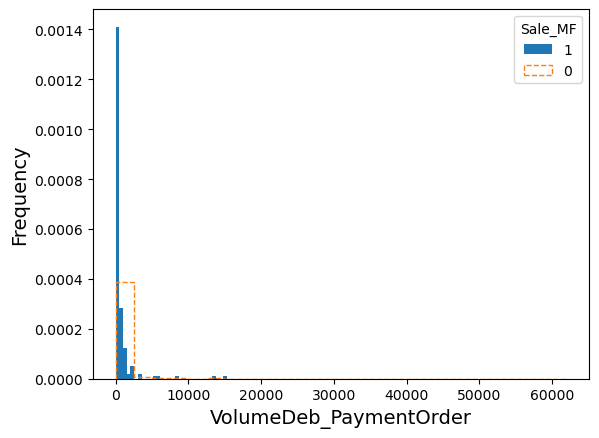

0.0
0.0


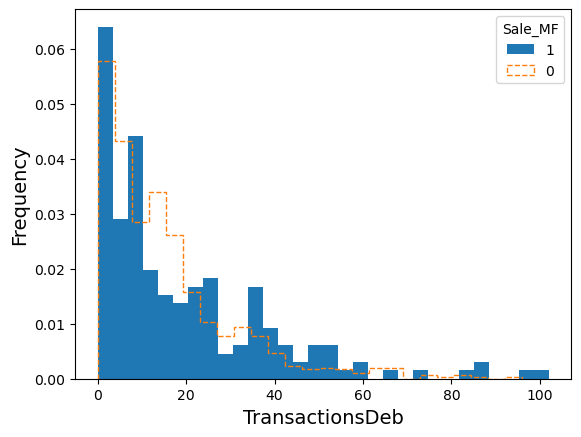

1.0
0.0


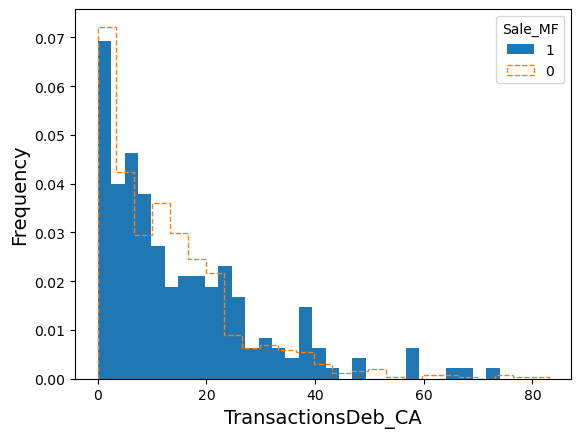

1.0
1.0


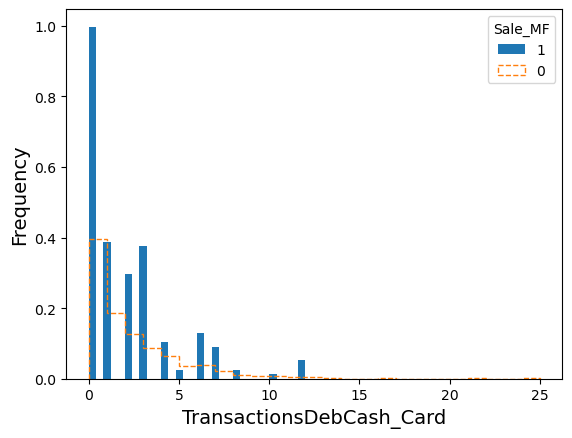

0.0
0.0


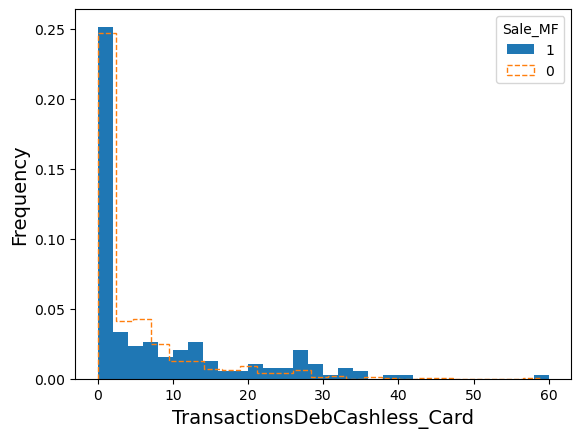

0.0
0.0


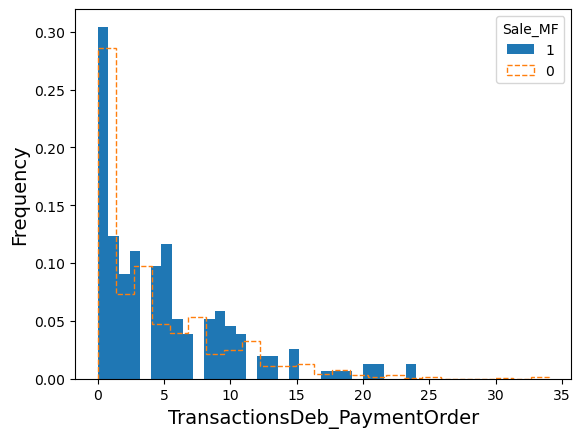

0.0
0.0


In [19]:
for input_counter in range(1,30):
    clients_MF1.iloc[:,input_counter].plot.hist(label='1', bins=30, density=1, sharex=True, sharey=True)
    clients_MF0.iloc[:,input_counter].plot.hist(linestyle='dashed', histtype='step', label='0', bins=25, density=1, sharex=True, sharey=True)
    plt.xlabel(clients_MF0.iloc[:,input_counter].name, fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.legend(title='Sale_MF')
    plt.show()
    print(clients_MF1.iloc[:,input_counter].value_counts().idxmax())
    print(clients_MF0.iloc[:,input_counter].value_counts().idxmax())

### CL Sales

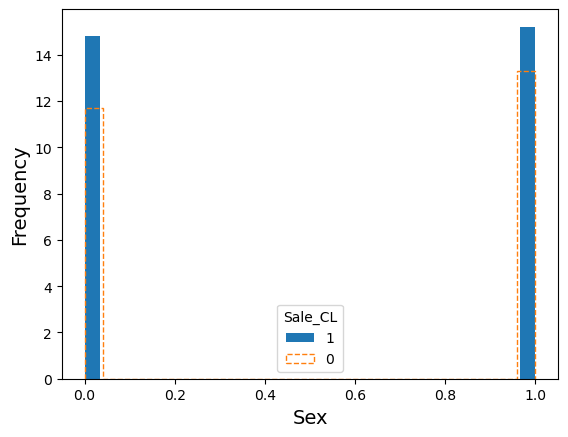

1
1


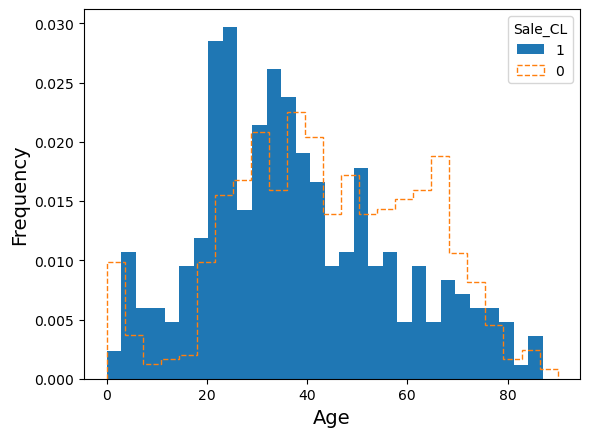

32.0
51.0


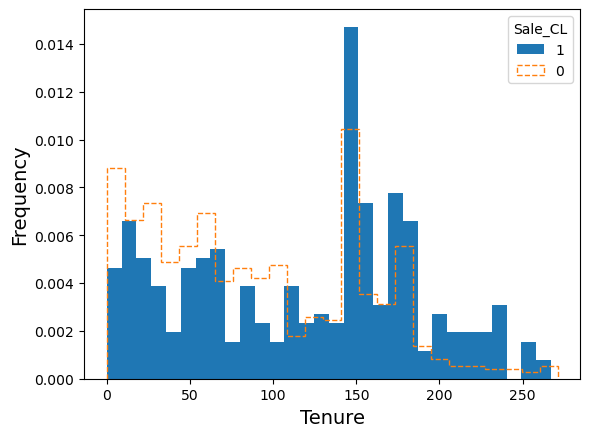

151.0
150.0


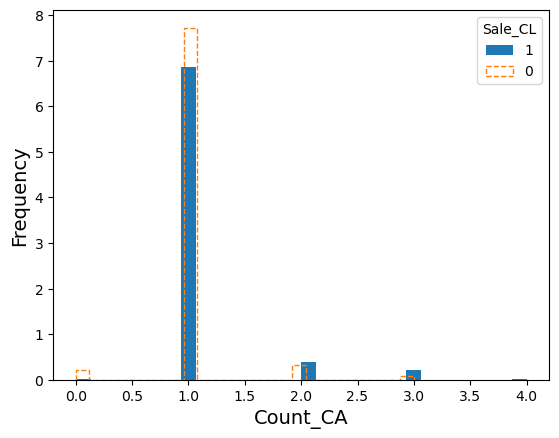

1.0
1.0


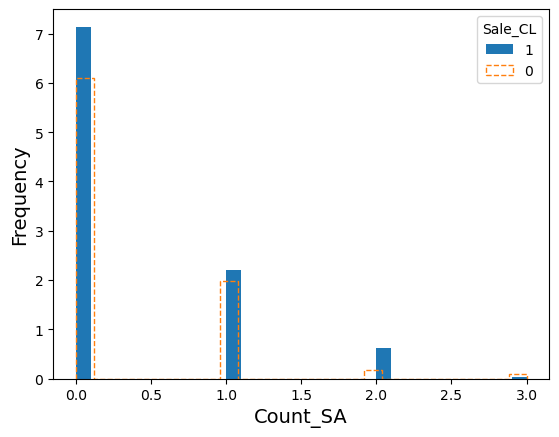

0.0
0.0


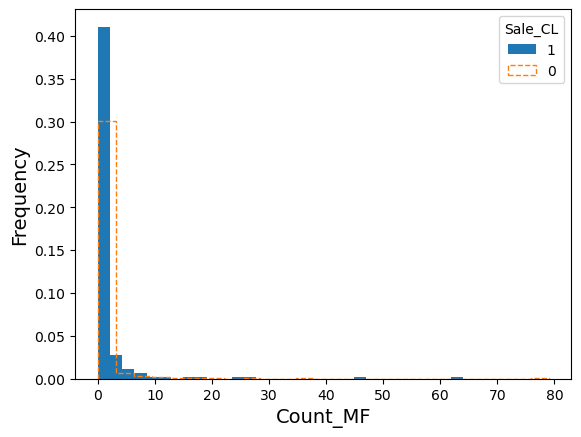

0.0
0.0


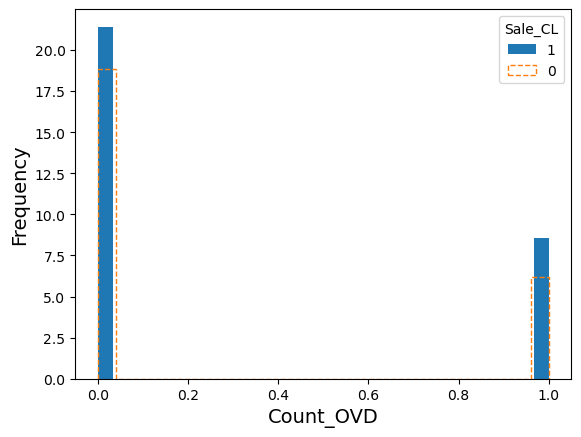

0.0
0.0


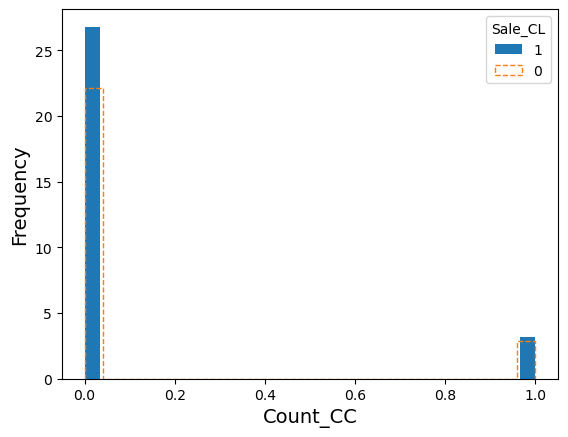

0.0
0.0


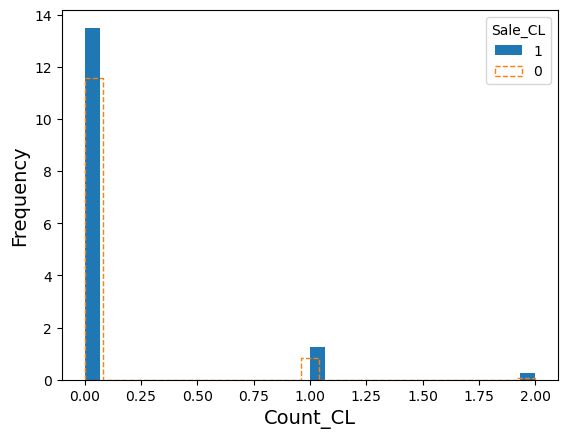

0.0
0.0


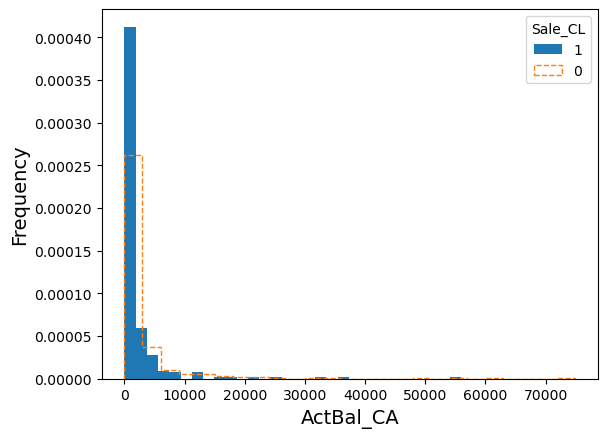

0.0
0.0


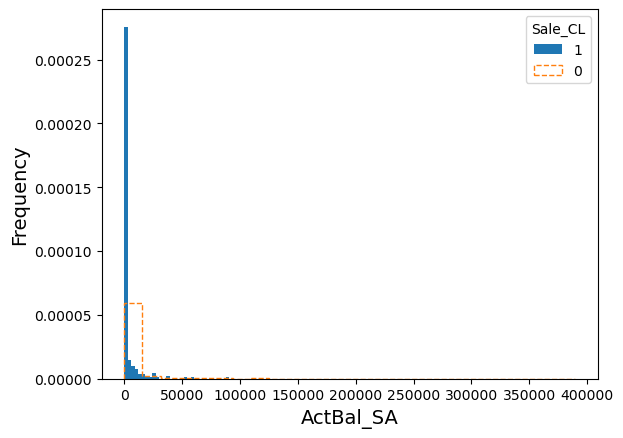

0.0
0.0


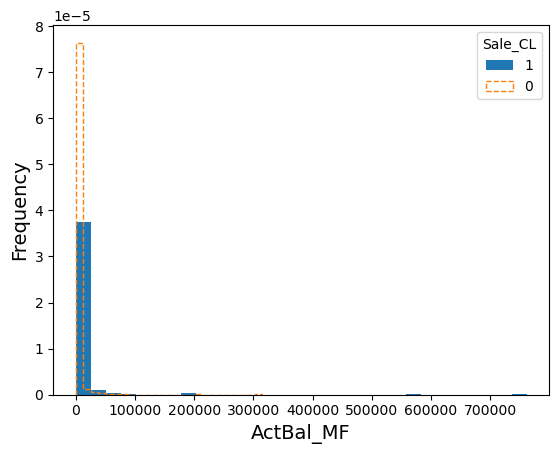

0.0
0.0


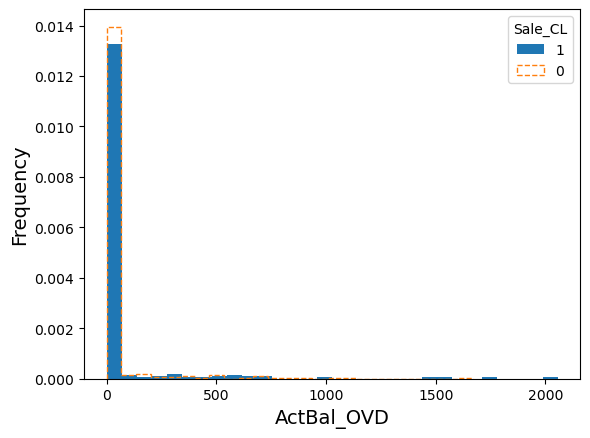

0.0
0.0


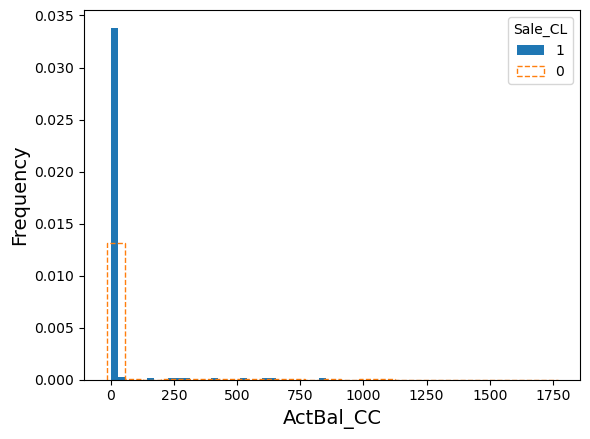

0.0
0.0


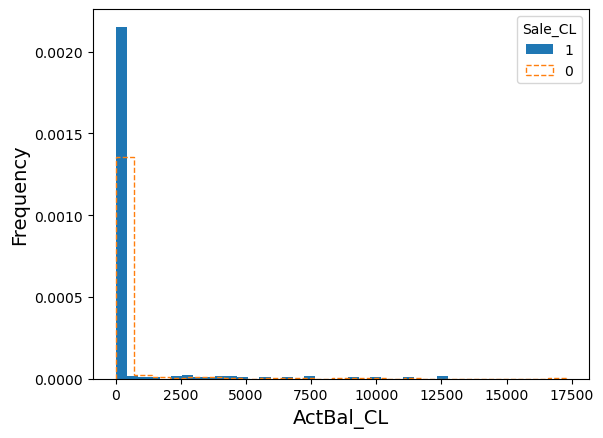

0.0
0.0


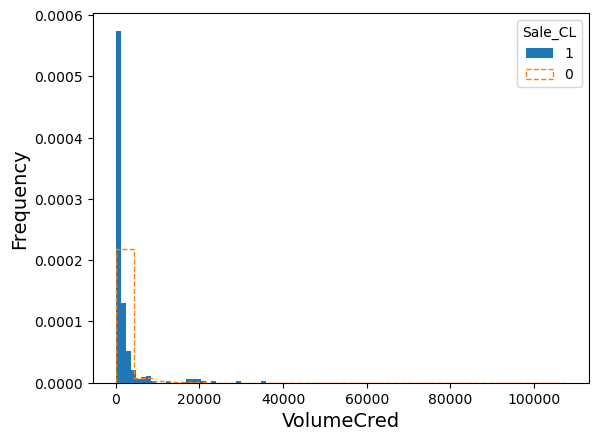

0.0
0.0


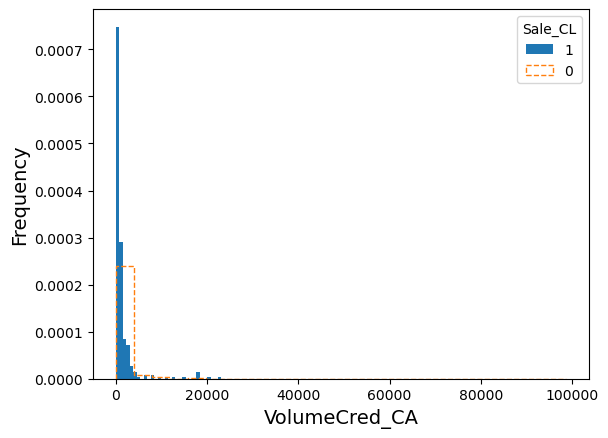

0.0
0.0


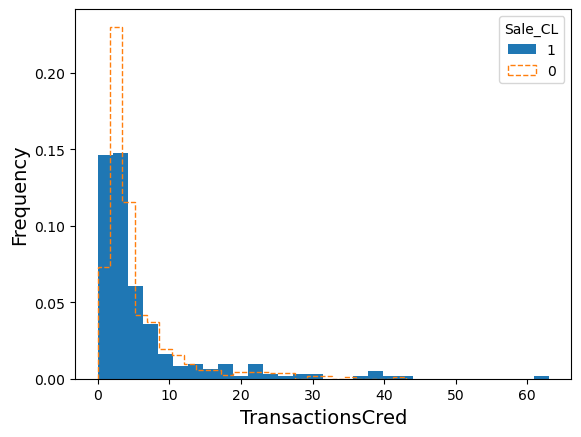

2.0
2.0


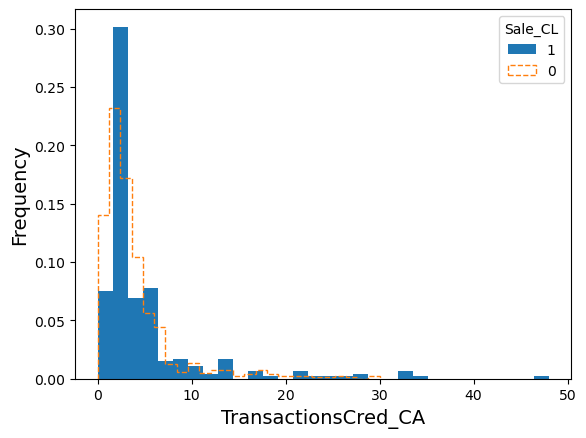

2.0
2.0


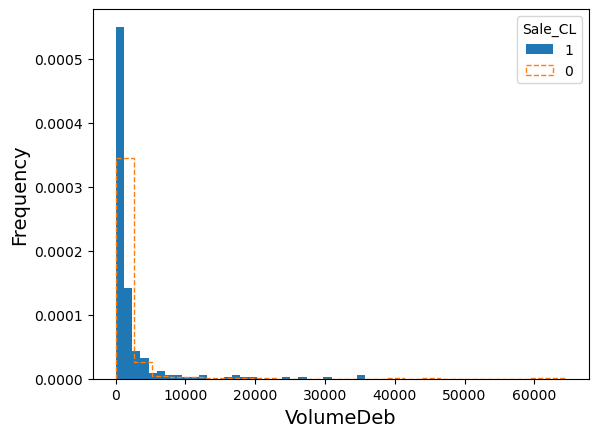

0.0
0.0


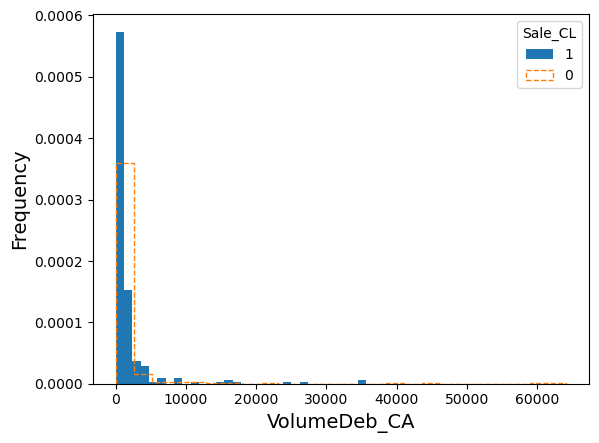

0.0
0.0


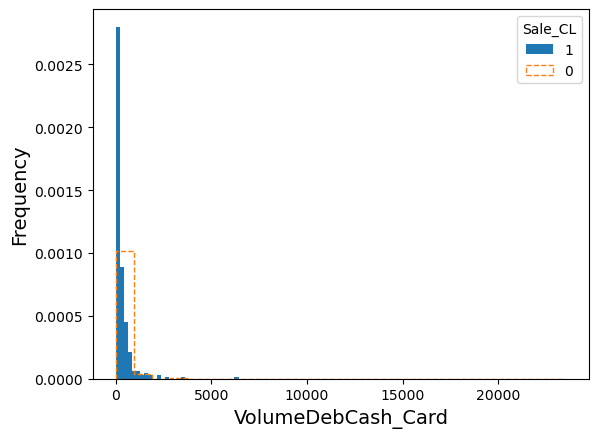

0.0
0.0


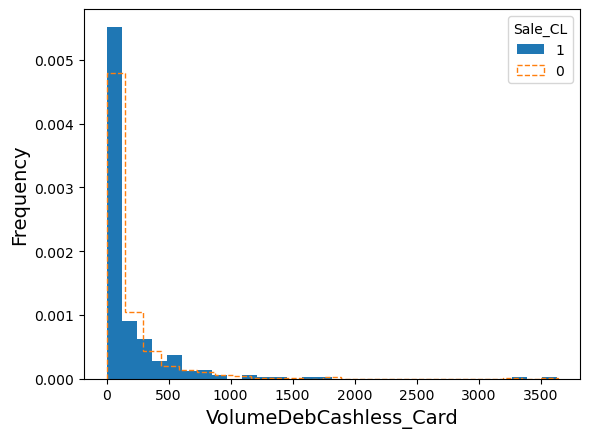

0.0
0.0


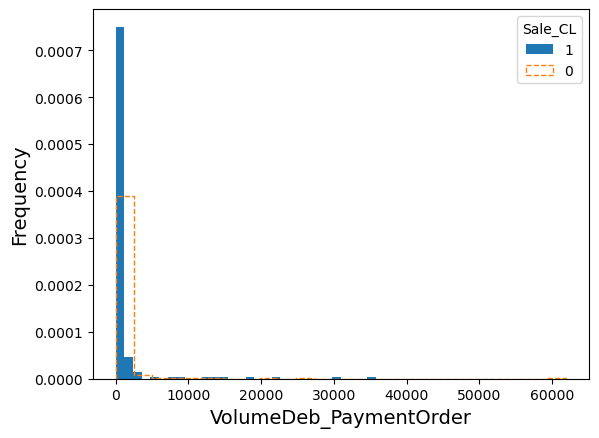

0.0
0.0


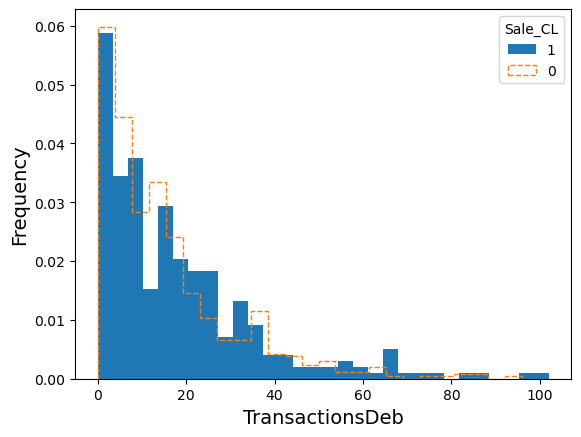

1.0
0.0


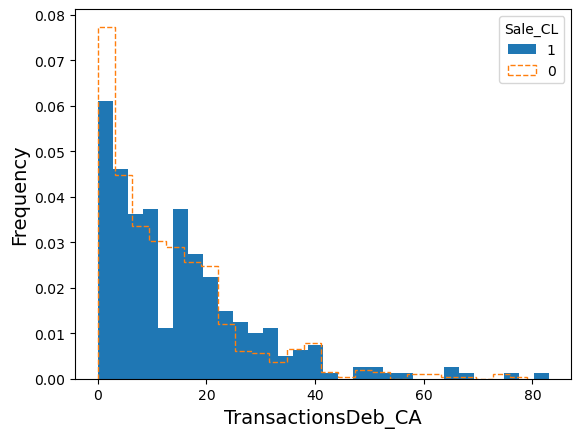

1.0
0.0


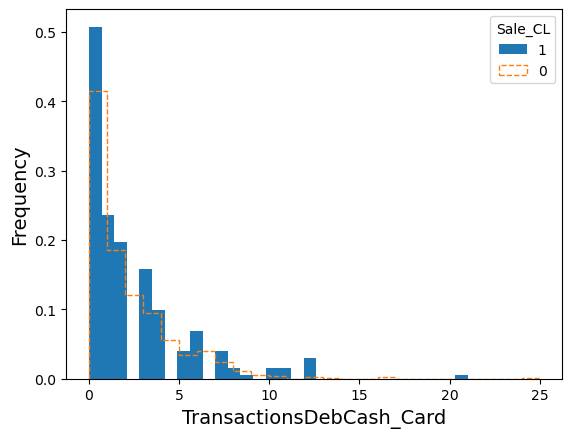

0.0
0.0


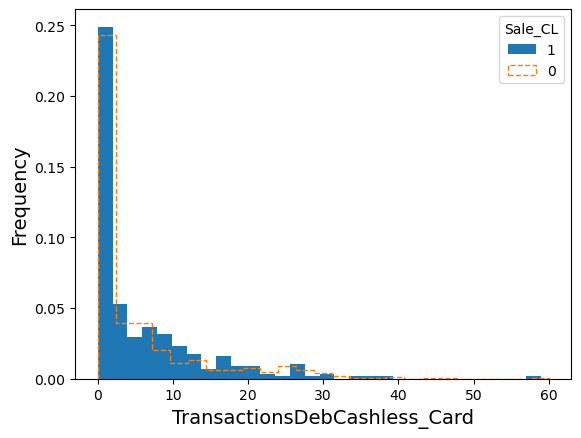

0.0
0.0


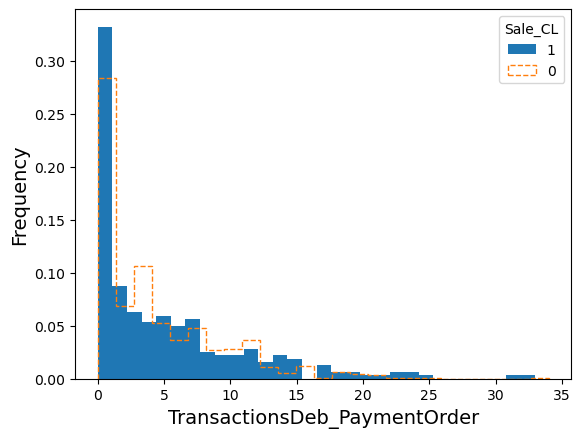

0.0
0.0


In [20]:
for input_counter in range(1,30):
    clients_CL1.iloc[:,input_counter].plot.hist(label='1', bins=30, density=1, sharex=True, sharey=True)
    clients_CL0.iloc[:,input_counter].plot.hist(linestyle='dashed', histtype='step', label='0', bins=25, density=1, sharex=True, sharey=True)
    plt.xlabel(clients_CL1.iloc[:,input_counter].name, fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.legend(title='Sale_CL')
    plt.show()
    print(clients_CL1.iloc[:,input_counter].value_counts().idxmax())
    print(clients_CL0.iloc[:,input_counter].value_counts().idxmax())